In [1]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# True parameters
a_true = 3.5
b_true = -2.0
c_true = 5.0

# Number of samples
n_samples = 100

# Generate uncorrelated x1 and x2
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)

# Check correlation (optional)
print(f"Correlation between x1 and x2: {np.corrcoef(x1, x2)[0,1]:.4f}")

# Generate y with small Gaussian noise
noise = np.random.normal(0, 0.1, n_samples)
y = a_true * x1 + b_true * x2 + c_true + noise

# Stack features with bias term (column of ones)
X = np.column_stack((x1, x2, np.ones(n_samples)))

# Closed-form solution: θ = (XᵀX)⁻¹Xᵀy
theta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract estimated parameters
a_hat, b_hat, c_hat = theta_hat

print(f"\nEstimated parameters:")
print(f"a ≈ {a_hat:.4f} (True: {a_true})")
print(f"b ≈ {b_hat:.4f} (True: {b_true})")
print(f"c ≈ {c_hat:.4f} (True: {c_true})")

Correlation between x1 and x2: -0.1364

Estimated parameters:
a ≈ 3.5226 (True: 3.5)
b ≈ -2.0012 (True: -2.0)
c ≈ 5.0089 (True: 5.0)


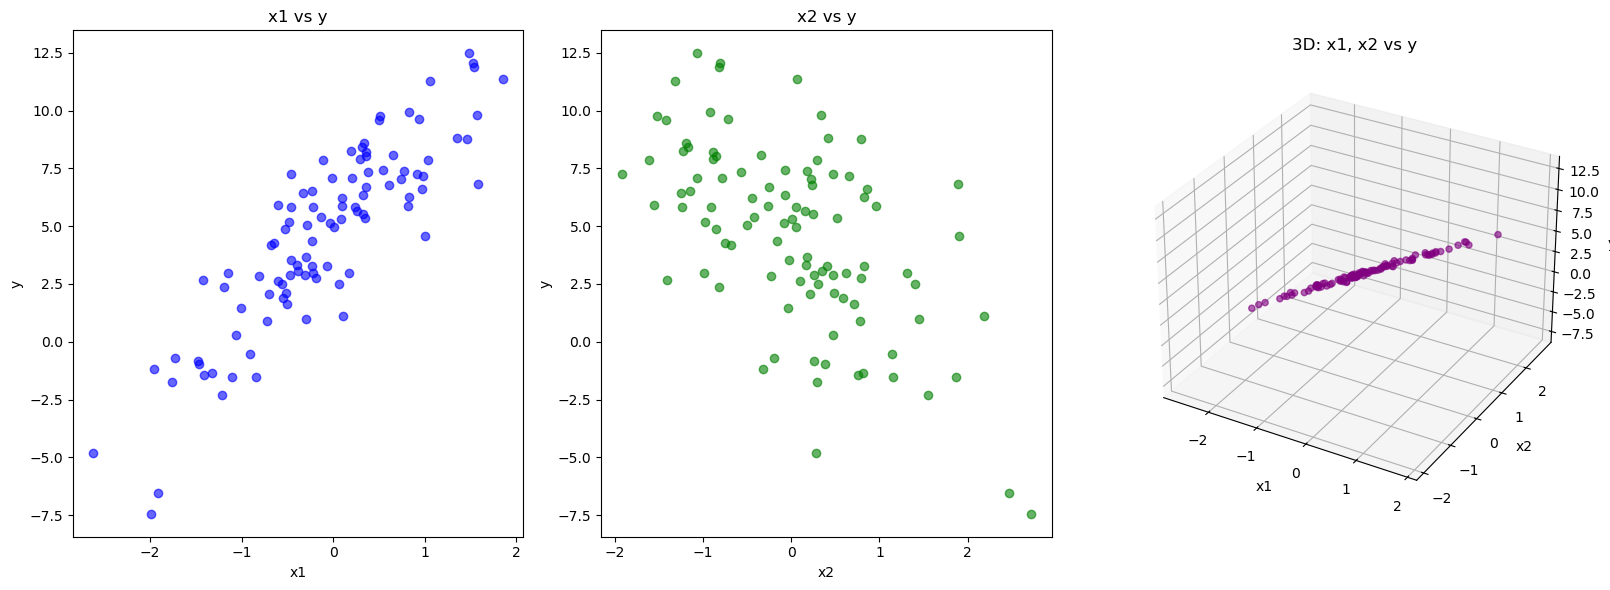

Determinant of (Xᵀ @ X): 721505.5337432632


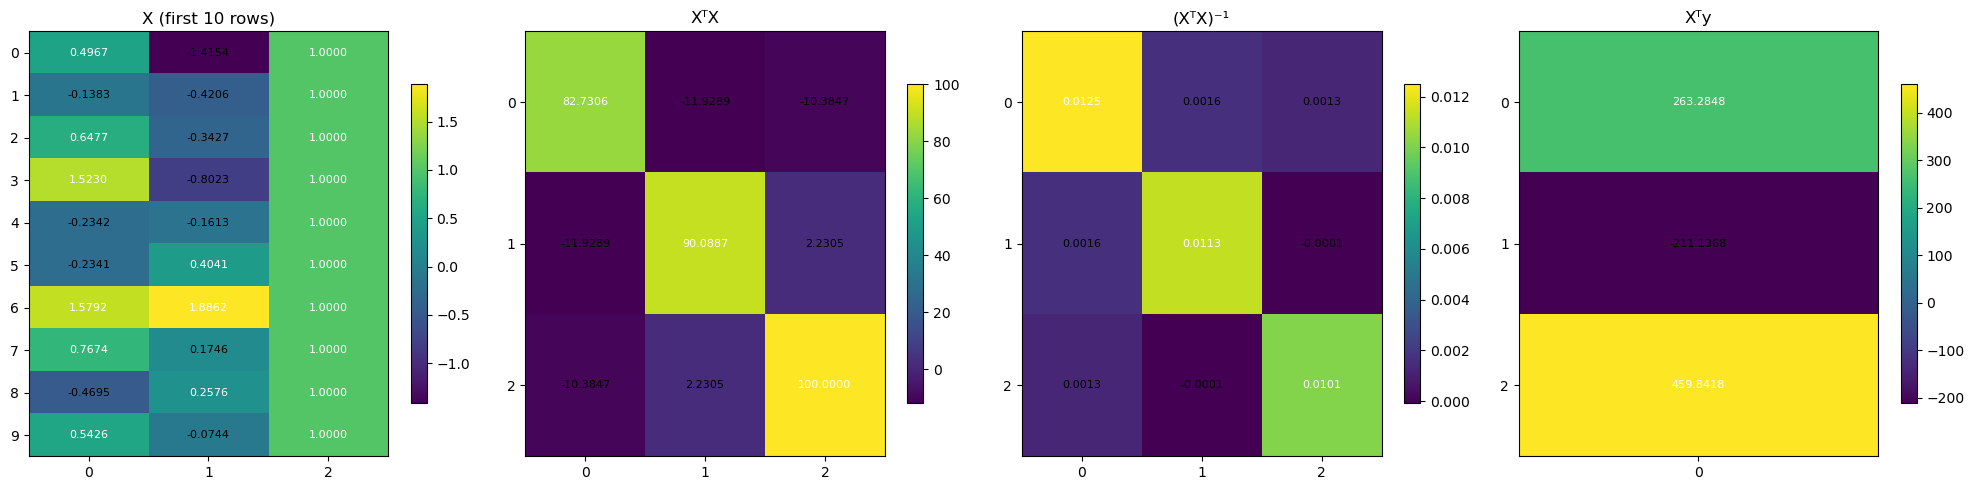

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# --- Step 1: Generate Data ---
a_true = 3.5
b_true = -2.0
c_true = 5.0
n_samples = 100

# Uncorrelated features
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
noise = np.random.normal(0, 0.1, n_samples)

# Output variable
y = a_true * x1 + b_true * x2 + c_true + noise

# Design matrix with bias (intercept) term
X = np.column_stack((x1, x2, np.ones(n_samples)))

# --- Step 2: Closed-Form Computation ---
XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X.T @ y
theta_hat = XTX_inv @ XTy

# --- Step 3: Visualization of Data ---
fig = plt.figure(figsize=(16, 6))

# Scatter plot of x1 vs y
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x1, y, color='blue', alpha=0.6)
ax1.set_title('x1 vs y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Scatter plot of x2 vs y
ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x2, y, color='green', alpha=0.6)
ax2.set_title('x2 vs y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

# 3D Scatter: x1, x2 vs y
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(x1, x2, y, color='purple', alpha=0.6)
ax3.set_title('3D: x1, x2 vs y')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')

plt.tight_layout()
plt.show()

# --- Step 4: Matrix Visualizations ---
def plot_matrix(matrix, title, ax, cmap='viridis'):
    im = ax.imshow(matrix, cmap=cmap, aspect='auto')
    ax.set_title(title)
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_yticks(range(matrix.shape[0]))
    
    # Show values in each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i, j]
            ax.text(j, i, f"{val:.4f}", ha='center', va='center', color='white' if im.norm(val) > 0.5 else 'black', fontsize=8)

    plt.colorbar(im, ax=ax, shrink=0.75)

print("Determinant of (Xᵀ @ X):", np.linalg.det(X.T @ X))
fig2, axs = plt.subplots(1, 4, figsize=(20, 5))

plot_matrix(X[:10], 'X (first 10 rows)', axs[0])
plot_matrix(XTX, 'XᵀX', axs[1])
plot_matrix(XTX_inv, '(XᵀX)⁻¹', axs[2])
plot_matrix(XTy.reshape(-1, 1), 'Xᵀy', axs[3])

plt.tight_layout()
plt.show()


Correlation matrix of [x1, x2, x3]:
[[ 1.         -0.13642221  0.99282073]
 [-0.13642221  1.         -0.13673405]
 [ 0.99282073 -0.13673405  1.        ]]

Determinant of (Xᵀ @ X): 809089.0498295758

Estimated Parameters:
a (x1) ≈ 3.4567 (True: 3.5)
b (x2) ≈ -2.0038 (True: -2.0)
x3 coeff ≈ 0.0269 (Expected: close to x1's weight, but unstable due to collinearity)
c (intercept) ≈ 5.0088 (True: 5.0)


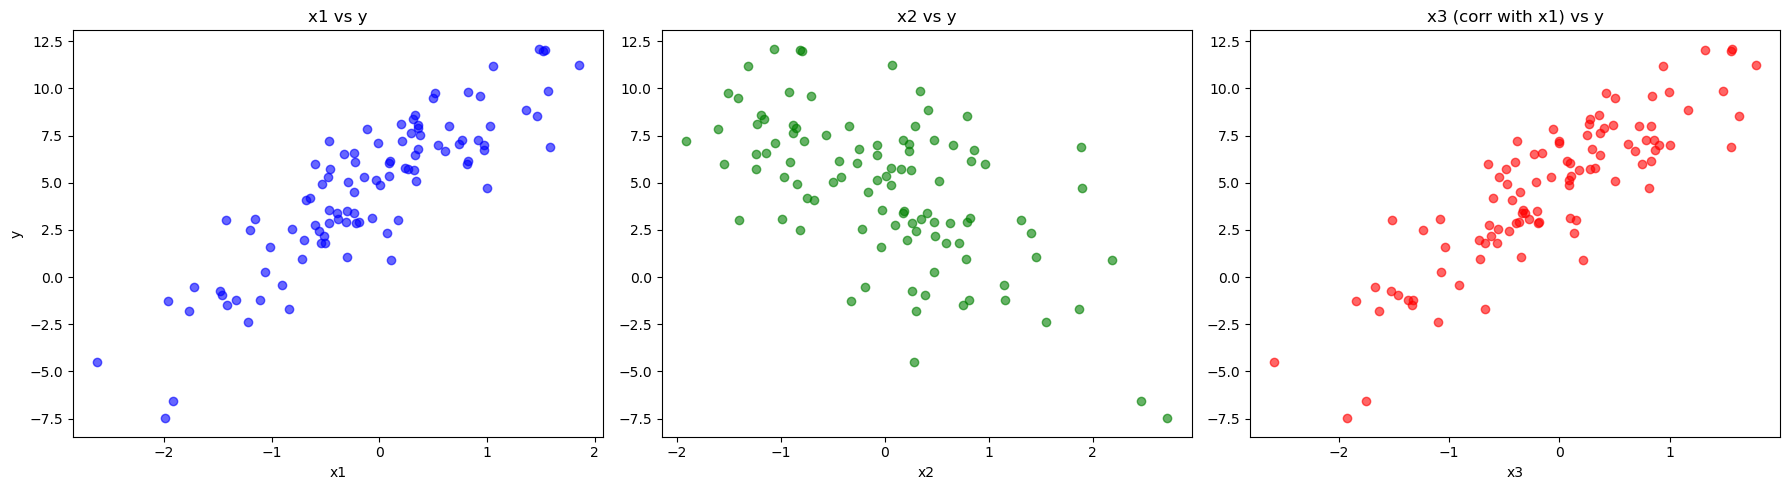

Determinant of (Xᵀ @ X): 809089.0498295758


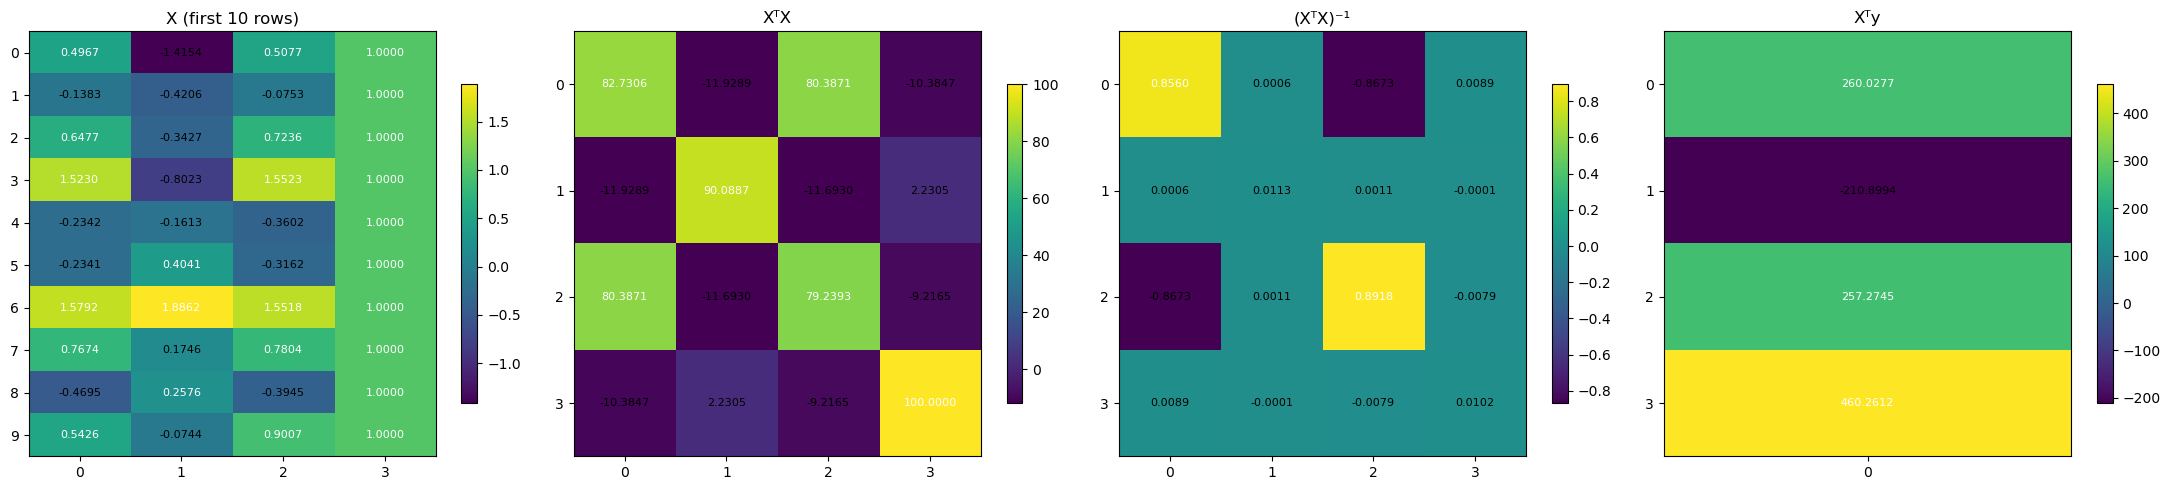

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True parameters
a_true = 3.5
b_true = -2.0
c_true = 5.0

n_samples = 100

# Step 1: Generate features
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)

# Generate x3 ~ 0.95 correlated with x1
rho = 0.95
x3 = rho * x1 + np.random.normal(0, 0.1, n_samples)

# Target variable
noise = np.random.normal(0, 0.1, n_samples)
y = a_true * x1 + b_true * x2 + c_true + noise

# Step 2: Build design matrix with bias term
X = np.column_stack((x1, x2, x3, np.ones(n_samples)))

# Step 3: Closed-form solution
XTX = X.T @ X
XTX_inv = np.linalg.inv(XTX)
XTy = X.T @ y
theta_hat = XTX_inv @ XTy

# Extract estimated params
a_hat, b_hat, x3_coef_hat, c_hat = theta_hat

# Print correlation matrix
print("\nCorrelation matrix of [x1, x2, x3]:")
print(np.corrcoef(np.stack([x1, x2, x3]), rowvar=True))

# Print determinant
print("\nDeterminant of (Xᵀ @ X):", np.linalg.det(XTX))

# Print estimated coefficients
print("\nEstimated Parameters:")
print(f"a (x1) ≈ {a_hat:.4f} (True: {a_true})")
print(f"b (x2) ≈ {b_hat:.4f} (True: {b_true})")
print(f"x3 coeff ≈ {x3_coef_hat:.4f} (Expected: close to x1's weight, but unstable due to collinearity)")
print(f"c (intercept) ≈ {c_hat:.4f} (True: {c_true})")

# Step 4: Visualization - x vs y
fig = plt.figure(figsize=(18, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(x1, y, color='blue', alpha=0.6)
ax1.set_title('x1 vs y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(x2, y, color='green', alpha=0.6)
ax2.set_title('x2 vs y')
ax2.set_xlabel('x2')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(x3, y, color='red', alpha=0.6)
ax3.set_title('x3 (corr with x1) vs y')
ax3.set_xlabel('x3')

plt.tight_layout()
plt.show()

# Step 5: Matrix heatmaps with values
def plot_matrix(matrix, title, ax, cmap='viridis'):
    im = ax.imshow(matrix, cmap=cmap, aspect='auto')
    ax.set_title(title)
    ax.set_xticks(range(matrix.shape[1]))
    ax.set_yticks(range(matrix.shape[0]))

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            val = matrix[i, j]
            ax.text(j, i, f"{val:.4f}", ha='center', va='center',
                    color='white' if im.norm(val) > 0.5 else 'black', fontsize=8)

    plt.colorbar(im, ax=ax, shrink=0.75)
print("Determinant of (Xᵀ @ X):", np.linalg.det(X.T @ X))

fig2, axs = plt.subplots(1, 4, figsize=(22, 5))
plot_matrix(X[:10], 'X (first 10 rows)', axs[0])
plot_matrix(XTX, 'XᵀX', axs[1])
plot_matrix(XTX_inv, '(XᵀX)⁻¹', axs[2])
plot_matrix(XTy.reshape(-1, 1), 'Xᵀy', axs[3])
plt.tight_layout()
plt.show()

In [7]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import numpy as np

# -- Reuse same data from before or rerun the same data generation --
# x1, x2, x3, y already created
# Stack into matrix X_lasso
X_lasso = np.column_stack((x1, x2, x3))

# Important: Scale features for Lasso to work properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_lasso)

# Lasso Regression with alpha (λ) parameter
lasso = Lasso(alpha=0.1)  # You can tune this value
lasso.fit(X_scaled, y)

# Extract coefficients
coef = lasso.coef_
intercept = lasso.intercept_

# Print results
print("\nLasso Estimated Parameters:")
print(f"a (x1)       ≈ {coef[0]:.4f}")
print(f"b (x2)       ≈ {coef[1]:.4f}")
print(f"x3 (corr x1) ≈ {coef[2]:.4f}")
print(f"intercept    ≈ {intercept:.4f}")


Lasso Estimated Parameters:
a (x1)       ≈ 3.0592
b (x2)       ≈ -1.8134
x3 (corr x1) ≈ 0.0000
intercept    ≈ 4.6026


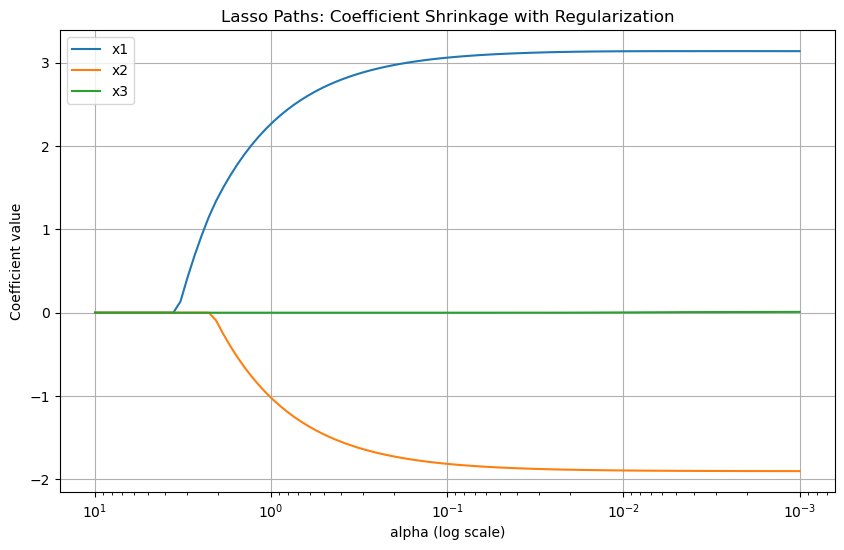

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import lasso_path

# Compute Lasso path
alphas, coefs, _ = lasso_path(X_scaled, y, alphas=np.logspace(-3, 1, 100))

# Plot the coefficient path
plt.figure(figsize=(10, 6))
for i, feature in enumerate(['x1', 'x2', 'x3']):
    plt.plot(alphas, coefs[i], label=feature)

plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Lasso Paths: Coefficient Shrinkage with Regularization')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reusing previous setup
np.random.seed(42)
n_samples = 100
x1 = np.random.normal(0, 1, n_samples)
x2 = np.random.normal(0, 1, n_samples)
x3 = 0.95 * x1 + np.random.normal(0, 0.1, n_samples)

a, b, c = 3.5, -2.0, 5.0
noise = np.random.normal(0, 0.1, n_samples)
y = a * x1 + b * x2 + c + noise

def fit_and_report(X, label):
    X_with_bias = np.column_stack((X, np.ones(X.shape[0])))
    theta = np.linalg.inv(X_with_bias.T @ X_with_bias) @ (X_with_bias.T @ y)
    preds = X_with_bias @ theta
    mse = np.mean((preds - y) ** 2)

    print(f"\n{label}:")
    for i, val in enumerate(theta[:-1]):
        print(f"  Coef {i} = {val:.4f}")
    print(f"  Intercept = {theta[-1]:.4f}")
    print(f"  MSE = {mse:.4f}")
    return theta, preds

# Case 1: Full Model
theta_full, pred_full = fit_and_report(np.column_stack((x1, x2, x3)), "Full Model (x1, x2, x3)")

# Case 2: Without x3
theta_no_x3, pred_no_x3 = fit_and_report(np.column_stack((x1, x2)), "No x3 (x1, x2)")

# Case 3: Without x1
theta_no_x1, pred_no_x1 = fit_and_report(np.column_stack((x2, x3)), "No x1 (x2, x3)")


Full Model (x1, x2, x3):
  Coef 0 = 3.4567
  Coef 1 = -2.0038
  Coef 2 = 0.0269
  Intercept = 5.0088
  MSE = 0.0075

No x3 (x1, x2):
  Coef 0 = 3.4829
  Coef 1 = -2.0039
  Intercept = 5.0090
  MSE = 0.0075

No x1 (x2, x3):
  Coef 0 = -2.0061
  Coef 1 = 3.5292
  Intercept = 4.9726
  MSE = 0.1471
